In [172]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

### Tratamento de dados

In [259]:
base = pd.read_csv('../Classificação/data/census.csv')

In [260]:
np.unique(base['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

C:\Users\wilso\AppData\Local\Temp\ipykernel_11536\4069710254.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=base, palette='Set2');


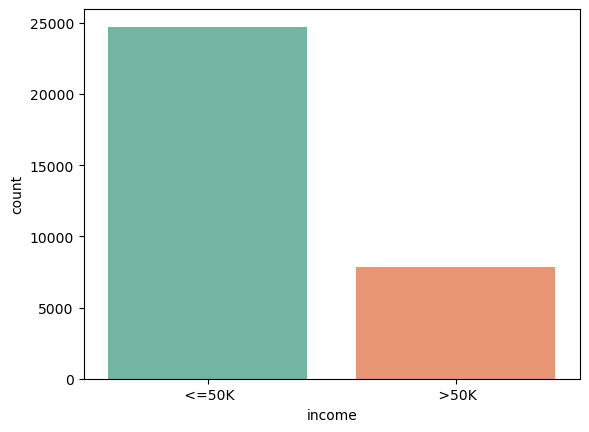

In [261]:
sns.countplot(x='income', data=base, palette='Set2');

In [262]:
X = base.iloc[:, 0:14].values
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [263]:
y = base.iloc[:, 14].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [264]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [265]:
X[:, 1] = label_encoder_workclass.fit_transform(X[:, 1])
X[:, 3] = label_encoder_education.fit_transform(X[:, 3])
X[:, 5] = label_encoder_marital.fit_transform(X[:, 5])
X[:, 6] = label_encoder_occupation.fit_transform(X[:, 6])
X[:, 7] = label_encoder_relationship.fit_transform(X[:, 7])
X[:, 8] = label_encoder_race.fit_transform(X[:, 8])
X[:, 9] = label_encoder_sex.fit_transform(X[:, 9])
X[:, 13] = label_encoder_country.fit_transform(X[:, 13])

In [266]:
X

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### Subamostragem com Tomek Links

In [249]:
tl = TomekLinks(sampling_strategy='all')
X_under, y_under = tl.fit_resample(X, y)

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The TomekLinks or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [250]:
X_under.shape, y_under.shape

((27763, 14), (27763,))

In [251]:
np.unique(y, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [252]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))

In [253]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X = onehotencoder.fit_transform(X).toarray()
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [254]:
X.shape

(32561, 108)

In [255]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_train_under.shape, X_test_under.shape

((23598, 14), (4165, 14))

In [256]:
random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [257]:
predictions = random_forest.predict(X_test_under)
accuracy = accuracy_score(y_test_under, predictions)
accuracy

0.8989195678271309

In [258]:
print(classification_report(y_test_under, predictions))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.94      3347
        >50K       0.81      0.63      0.71       818

    accuracy                           0.90      4165
   macro avg       0.86      0.80      0.82      4165
weighted avg       0.89      0.90      0.89      4165



### Sobreamostragem com SMOTE

In [267]:
X.shape

(32561, 14)

In [268]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [269]:
X_over.shape, y_over.shape

((49440, 14), (49440,))

In [270]:
np.unique(y, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [271]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [272]:
# onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
# X = onehotencoder.fit_transform(X_over).toarray()
# X

In [273]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_train_over.shape, X_test_over.shape

((42024, 14), (7416, 14))

In [274]:
random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest.fit(X_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [276]:
predictions = random_forest.predict(X_test_over)
accuracy = accuracy_score(y_test_over, predictions)
accuracy

0.9083063646170443

In [278]:
print(classification_report(y_test_over, predictions))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

